Warning message:
"package 'rbcb' was built under R version 3.6.3"
Warning message:
"package 'ggplot2' was built under R version 3.6.3"
Warning message:
"package 'ggthemes' was built under R version 3.6.3"


[1] "Captação total em milhares de reais = R$511.64712"


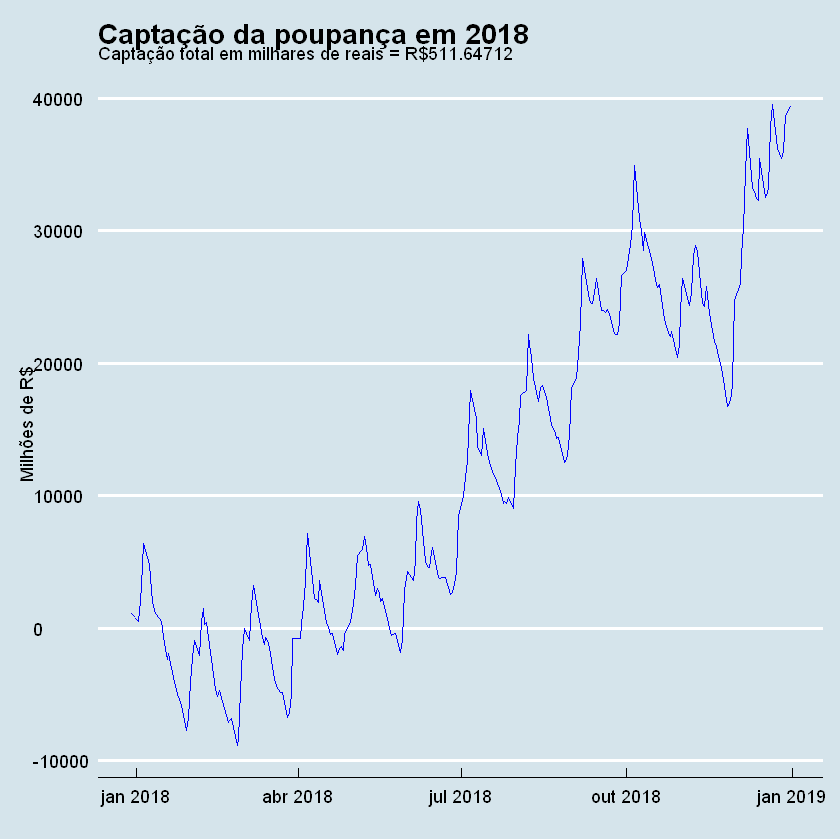

In [1]:
library(rbcb)
library(ggplot2)
library(ggthemes)
options(scipen = 999)
start_date <- as.Date("2018-01-01")
end_date <- as.Date("2018-12-31")
captacao_liquida <- get_series(c(24), start_date = start_date,
                               end_date = end_date, as = "data.frame")
captacao_liquida$end_date <- NULL
colnames(captacao_liquida) <- c("Data", "Valor")
captacao_liquida$Valor <- captacao_liquida$Valor/1000
captacao_liquida$Valor <- cumsum(captacao_liquida$Valor)
total <- captacao_liquida$Valor[length(captacao_liquida)]
ggplot(captacao_liquida, aes(x = Data))+
  geom_line(aes(y = Valor), colour = "blue")+
  labs(x = "", y = "Milhões de R$",
       title = format(start_date,"Captação da poupança em %Y"),
       subtitle = print(paste0("Captação total em milhares de reais = R$", total)))+
  theme_economist()